In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os as os
from itertools import product
import numpy as np
import scipy.stats as ss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Reading dataset


In [4]:
data = pd.read_excel(r'TIMSS2019.xlsx') 
df = pd.DataFrame(data)
# df.head()

# checking dataset for null value

In [5]:
df.info(verbose=True , null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 338 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    IDCNTRY            5980 non-null   int64  
 1    IDBOOK             5980 non-null   int64  
 2    IDSCHOOL           5980 non-null   int64  
 3    IDCLASS            5980 non-null   int64  
 4    IDSTUD             5980 non-null   int64  
 5    finalscore         5975 non-null   object 
 6    totalscore         5980 non-null   float64
 7    finalscorealgebra  5962 non-null   object 
 8    finalscoredat      5950 non-null   object 
 9    finalscoregeo      5955 non-null   object 
 10   finalscorenum      5973 non-null   object 
 11   BSBG01             5979 non-null   float64
 12   BSBG03             5979 non-null   float64
 13   BSBG04             5979 non-null   float64
 14   BSBG05A            5979 non-null   float64
 15   BSBG05B            5979 non-null   float64
 16   BSBG

# there are two columns that are totaly null 
droping this two columns and droping missing values

In [6]:
df = df.drop(columns=['BSBGSEC', 'BSDGSEC'])
df = df.dropna()
df.info(verbose=True , null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 0 to 5979
Data columns (total 336 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    IDCNTRY            5931 non-null   int64  
 1    IDBOOK             5931 non-null   int64  
 2    IDSCHOOL           5931 non-null   int64  
 3    IDCLASS            5931 non-null   int64  
 4    IDSTUD             5931 non-null   int64  
 5    finalscore         5931 non-null   object 
 6    totalscore         5931 non-null   float64
 7    finalscorealgebra  5931 non-null   object 
 8    finalscoredat      5931 non-null   object 
 9    finalscoregeo      5931 non-null   object 
 10   finalscorenum      5931 non-null   object 
 11   BSBG01             5931 non-null   float64
 12   BSBG03             5931 non-null   float64
 13   BSBG04             5931 non-null   float64
 14   BSBG05A            5931 non-null   float64
 15   BSBG05B            5931 non-null   float64
 16   BSBG

# reading data and concating them together

In [7]:
data_BCGM7 = pd.read_excel(r'T2019_G8_Codebook.xlsx', sheet_name='BCGM7')
data_BSGM7 = pd.read_excel(r'T2019_G8_Codebook.xlsx', sheet_name='BSGM7')
data_BTMM7 = pd.read_excel(r'T2019_G8_Codebook.xlsx', sheet_name='BTMM7')

In [8]:
df_BCGM7 = pd.DataFrame(data_BCGM7 , columns=['Variable' , 'Label'])
df_BCGM7['kind'] = '1'
df_BSGM7 = pd.DataFrame(data_BSGM7 , columns=['Variable' , 'Label'])
df_BSGM7['kind'] = '2'
df_BTMM7 = pd.DataFrame(data_BTMM7 , columns=['Variable' , 'Label'])
df_BTMM7['kind'] = '3'


In [9]:
df_detail = pd.concat([df_BCGM7 , df_BSGM7 , df_BTMM7 ])
# df_detail

# summarizing data

In [10]:
df.describe()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,totalscore,BSBG01,BSBG03,BSBG04,BSBG05A,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
count,5931.0,5931.000000,5931.000000,5931.000000,5.931000e+03,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,...,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.00000,5931.000000
mean,364.0,7.506997,5111.445793,511146.473613,5.111466e+07,11.595178,1.506491,1.787220,2.314281,1.287135,...,3.335694,2.509863,2.061878,1.476142,1.479683,2.156129,102.922891,43.626931,90.08846,68.970606
std,0.0,4.038025,62.818918,6281.859022,6.281859e+05,7.231151,0.500000,1.058927,1.226202,0.711980,...,1.365476,0.583958,0.518184,0.576869,0.644382,1.055255,65.388541,72.084669,68.01159,74.211039
min,364.0,1.000000,5001.000000,500104.000000,5.001040e+07,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.666670,0.000000,16.66667,0.000000
25%,364.0,4.000000,5056.000000,505602.000000,5.056022e+07,6.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,100.000000,28.571430,83.33333,50.000000
50%,364.0,7.000000,5113.000000,511303.000000,5.113033e+07,10.000000,2.000000,1.000000,2.000000,1.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,100.000000,42.857140,83.33333,66.666670
75%,364.0,11.000000,5164.000000,516403.000000,5.164034e+07,15.000000,2.000000,3.000000,3.000000,1.000000,...,5.000000,3.000000,2.000000,2.000000,2.000000,3.000000,100.000000,42.857140,100.00000,83.333330
max,364.0,14.000000,5220.000000,522001.000000,5.220013e+07,39.000000,2.000000,9.000000,9.000000,9.000000,...,5.000000,3.000000,3.000000,3.000000,3.000000,9.000000,999.000000,999.000000,999.00000,999.000000


# functions

In [11]:
def select_feature_with_correlation(df , y , limit):
    corr = df.corr()[y]
    df_corr = pd.DataFrame(corr)
    df_corr = df_corr.rename(columns={"totalscore": "correlation"})
    df_corr['Variable'] = corr.index
    df_corr = pd.merge(df_corr, df_detail, how='inner', on = 'Variable')
    opp_or = (df_corr['correlation']>= limit).apply(int) + (df_corr['correlation']<= -limit).apply(int) > 0
    important_features = df_corr[opp_or].sort_values(by='correlation', ascending=False)
    return important_features


In [12]:
def select_feature_with_chi2(df , y):
    X = df.iloc[: , 11:]  #independent columns
    y = df[y]    #target column 
    #apply SelectKBest class to extract best features
    bestfeatures = SelectKBest(score_func=chi2)
    fit = bestfeatures.fit(X,y)
    dfpvalue = pd.DataFrame(fit.pvalues_)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat three dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores , dfpvalue],axis=1)
    featureScores.columns = ['Variable','Score','pvalue']  #naming the dataframe columns
    featureScores = pd.merge(featureScores, df_detail, how='inner', on = 'Variable')
    important_feature_with_chi2 = featureScores.sort_values(by='Score', ascending=False)
    return important_feature_with_chi2

# selecting the most importand features with correlation 
featur is important if |correlation| > 0.2
this is linear relation between x and y that y is totalscore colomn

<AxesSubplot:xlabel='Label'>

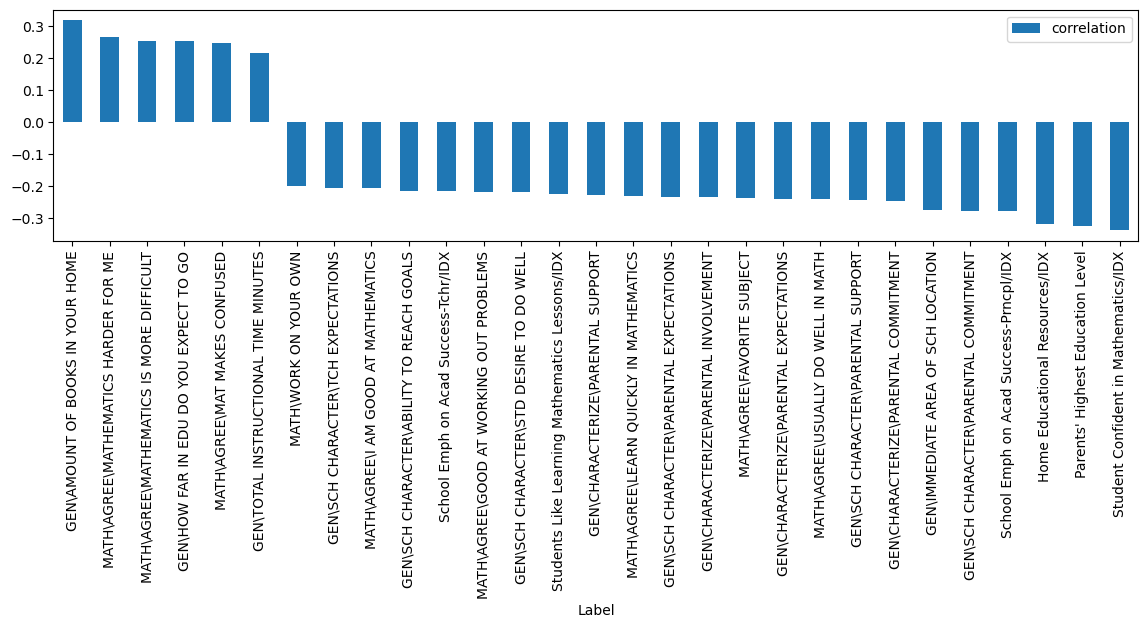

In [12]:
important_features = select_feature_with_correlation(df , 'totalscore' , 0.2)
important_features.plot.bar(x = 'Label', y = 'correlation',figsize=(14,3))

# selecting important feature with chi2 test

In [82]:
important_features_chi2 = select_feature_with_chi2(df , 'finalscore')
important_features_chi2.head(20)


,Variable,Score,pvalue,Label,kind
98,BSBGHER,1.646568e+07,0.000000e+00,Home Educational Resources/SCL,2
112,BSBGSVM,9.786679e+06,0.000000e+00,Students Value Mathematics/SCL,2
106,BSBGICM,6.905589e+06,0.000000e+00,Instructional Clarity in Mathematics Lessons/SCL,2
102,BSBGSB,6.408936e+06,0.000000e+00,Student Bullying/SCL,2
108,BSBGDML,6.064478e+06,0.000000e+00,Disorderly Behavior during Math Lessons/SCL,2
104,BSBGSLM,5.016194e+06,0.000000e+00,Students Like Learning Mathematics Lessons/SCL,2
110,BSBGSCM,4.558506e+06,0.000000e+00,Student Confident in Mathematics/SCL,2
100,BSBGSSB,1.760219e+06,0.000000e+00,Students Sense of School Belonging/SCL,2
188,BCDGTIHY,1.704132e+04,0.000000e+00,Total Instructional Hours per Year,1
248,BTBM14,2.529580e+03,0.000000e+00,MATH\TIME SPENT MATH INSTR MINUTES,3


# selecting important features for girls with chi2

In [14]:
girl_df = df[df["BSBG01"] == 1]
boy_df = df[df["BSBG01"] == 2]

In [83]:
important_features_girls_chi2 = select_feature_with_chi2(girl_df , 'finalscore')
# important_features_girls_chi2.head(20)

# selecting important features for boys with chi2

In [84]:
important_features_boys_chi2 = select_feature_with_chi2(boy_df, 'finalscore')
# important_features_boys_chi2.head(20)

# selecting important feature for girls with correlation

In [87]:
important_features_girls_correlation =  select_feature_with_correlation(girl_df, 'totalscore', 0.2)
#important_features_girls_correlation

# selecting important feature for boys with correlation

In [88]:
important_features_boys_correlation =  select_feature_with_correlation(boy_df, 'totalscore', 0.2)
# important_features_boys_correlation

# comparing important feature between boys and girl

<AxesSubplot:xlabel='Label'>

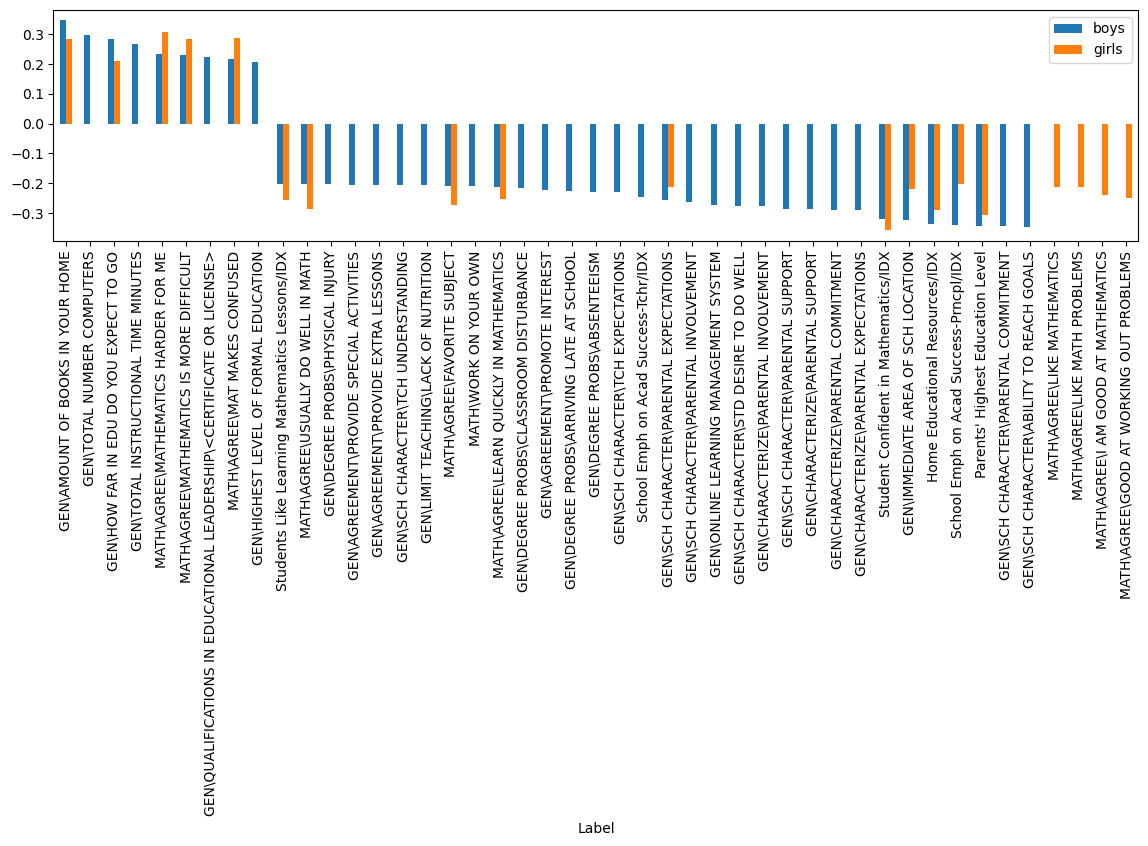

In [89]:
temp1 = important_features_boys_correlation
temp2= important_features_girls_correlation
temp = pd.merge(temp1, temp2, how='outer', on=['Label'])
temp = temp.rename(columns={"correlation_x": "boys" , "correlation_y": "girls"})
temp.plot.bar(x = 'Label',figsize=(14,3))

# These features  are important for both girls and boys according to chi2

In [90]:
temp1 = important_features_girls_chi2.head(20)
temp2 = important_features_boys_chi2.head(20)
temp = pd.merge(temp1, temp2, how='inner', on=['Label'])
# temp = temp.rename(columns={"Variable_x":"girls","Variable_y":"boys"})
# temp = temp[["boys","girls","Label"]]
temp [["Label"]]

,Label
0,Home Educational Resources/SCL
1,Disorderly Behavior during Math Lessons/SCL
2,Students Sense of School Belonging/SCL
3,Students Like Learning Mathematics Lessons/SCL
4,Instructional Clarity in Mathematics Lessons/SCL
5,Student Confident in Mathematics/SCL
6,Student Bullying/SCL
7,Students Value Mathematics/SCL
8,Total Instructional Hours per Year
9,GEN\HOW MANY PEOPLE LIVE IN AREA


# comparing important feature between geo ,  dat ,  num and algebra 

In [91]:
important_feature_geo = select_feature_with_chi2(df , 'finalscoregeo')
temp1 = important_feature_geo.head(10)

In [92]:
important_feature_num = select_feature_with_chi2(df , 'finalscorenum')
temp2 =important_feature_num.head(10)

In [93]:
important_feature_dat = select_feature_with_chi2(df , 'finalscoredat')
temp3 =important_feature_dat.head(10)

In [94]:
important_feature_algebra = select_feature_with_chi2(df , 'finalscorealgebra')
temp4 =important_feature_algebra.head(10)

In [95]:
temp1['rank'] = [10-i for i in range(0 , 10)]
temp2['rank'] = [10-i for i in range(0 , 10)]
temp3['rank'] = [10-i for i in range(0 , 10)]
temp4['rank'] = [10-i for i in range(0 , 10)]

<AxesSubplot:xlabel='Label'>

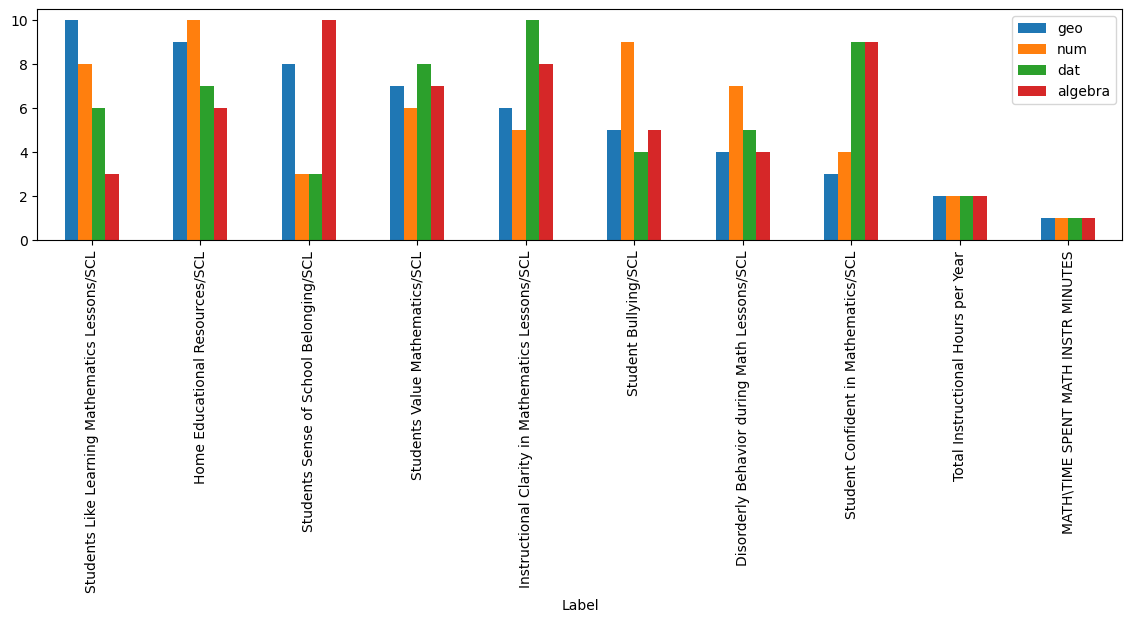

In [96]:
temp1 = pd.merge(temp1, temp2, how='outer', on=['Label'])
temp2 = pd.merge(temp4, temp3, how='outer', on=['Label'])
temp = pd.merge(temp1, temp2, how='outer', on=['Label'])
temp = temp[["rank_x_x","rank_x_y","rank_y_x","rank_y_y" , "Label"]]
temp = temp.rename(columns={"rank_x_x":"geo","rank_x_y":"num","rank_y_x":"dat","rank_y_y":"algebra"})
temp.plot.bar(x = 'Label',figsize=(14,3))